In [1]:
import numpy as np
import pandas as pd
import glob
import os  
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns

import keras
from keras import initializers
from keras.models import Sequential
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize

from keras import models
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta, Nadam

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical

from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
path, dirs, files = next(os.walk(r"C:\\Users\\Tony\\Desktop\\Summer\\Histology\\data"))
dirs

['ADIPOSE',
 'COMPLEX',
 'DEBRIS',
 'EMPTY',
 'LYMPHO',
 'MUCOSA',
 'STROMA',
 'TUMOR']

In [3]:
class_label = ['ADIPOSE',
 'COMPLEX',
 'DEBRIS',
 'EMPTY',
 'LYMPHO',
 'MUCOSA',
 'STROMA',
 'TUMOR']

In [4]:
i = 0

X_data = []
Y_data = []
display_img = []

for label in class_label:
    files = glob.glob (r"C:\\Users\\Tony\\Desktop\\Summer\\Histology\\data\\" + str(label) + "/*.tif")
    
    for b in range(5):
        display_img.append(files[b])
    
    for myFile in files:
      img = Image.open(myFile)
      #img.thumbnail((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio
      img = img.resize((128,128), Image.ANTIALIAS) # resizes image without ratio
      img = np.array(img)

      if img.shape == (128, 128, 3):
        # Add the numpy image to matrix with all data
        X_data.append (img)
        Y_data.append (i)
        
    i += 1
    
# Categorizing the y data
y_cat = to_categorical(Y_data, len(class_label))

In [5]:
numpy_image = []

for total_files in display_img:
    img = Image.open(total_files)
    img = img.resize((128,128), Image.ANTIALIAS) # resizes image without ratio
    img = np.array(img)
    
    if img.shape == (128, 128, 3):
        # Add the numpy image to matrix with all data
        numpy_image.append(img)
        
numpy_image = np.array(numpy_image)

adipose1 = []
complex1 = []
debris1 = []
empty1 = []
lympho1 = []
mucosa1 = []
stroma1 = []
tumor1 = []

for k in range(40):
    if (k<5):
        adipose1.append(numpy_image[k])
    elif (k<10):
        complex1.append(numpy_image[k])
    elif (k<15):
        debris1.append(numpy_image[k])
    elif (k<20):
        empty1.append(numpy_image[k])
    elif (k<25):
        lympho1.append(numpy_image[k])
    elif (k<30):
        mucosa1.append(numpy_image[k])
    elif (k<35):
        stroma1.append(numpy_image[k])
    elif (k<40):
        tumor1.append(numpy_image[k])

Adipose


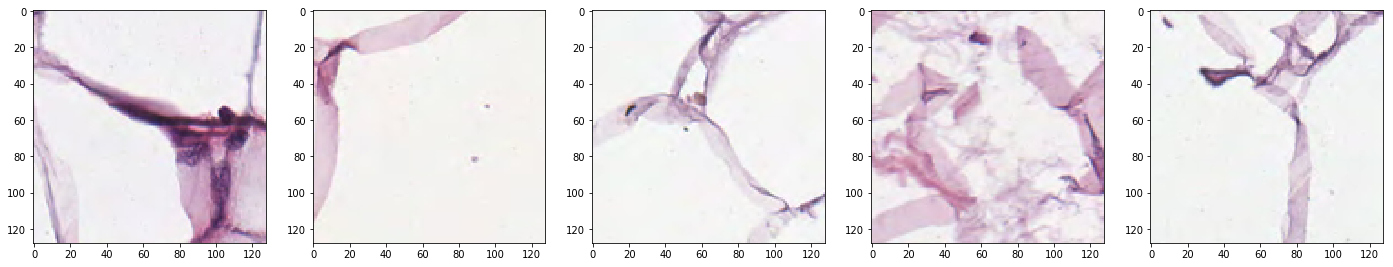

Complex


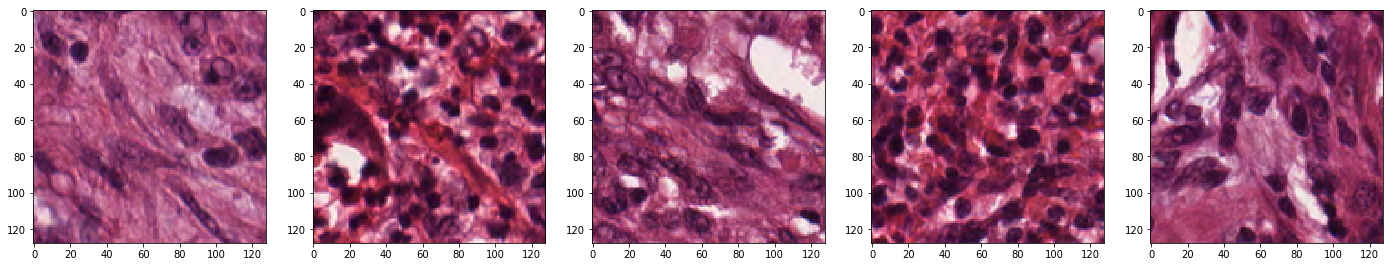

Debris


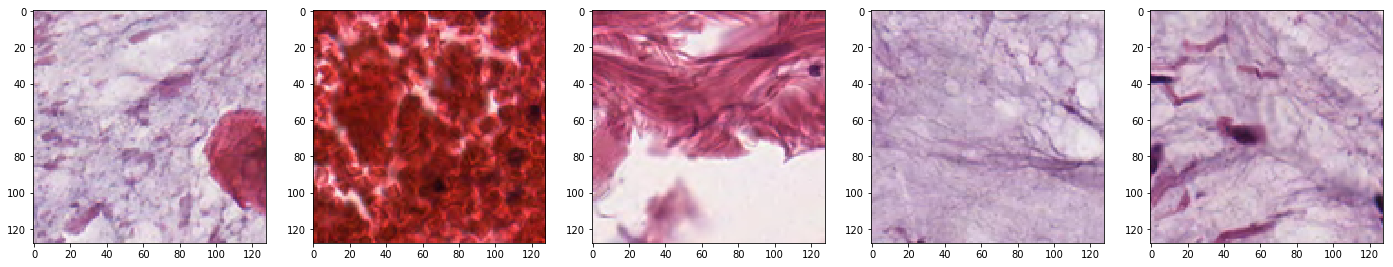

Empty


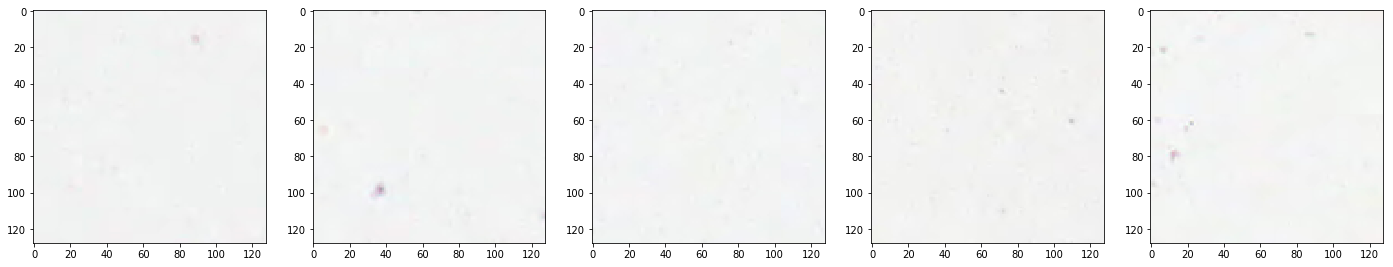

Lympho


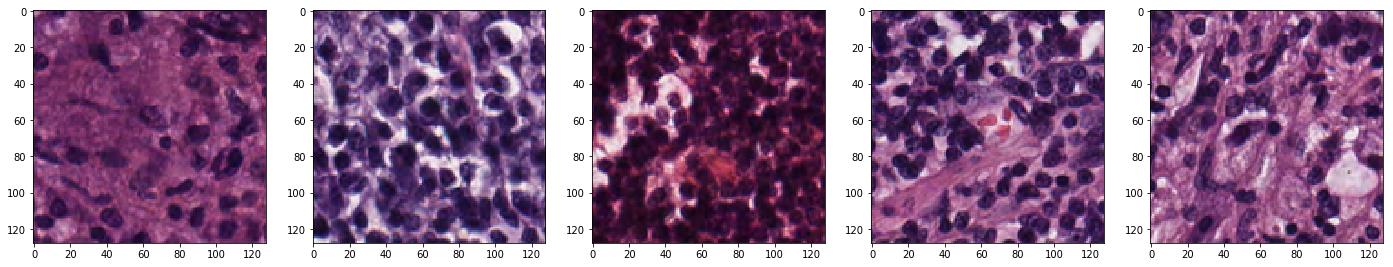

Mucosa


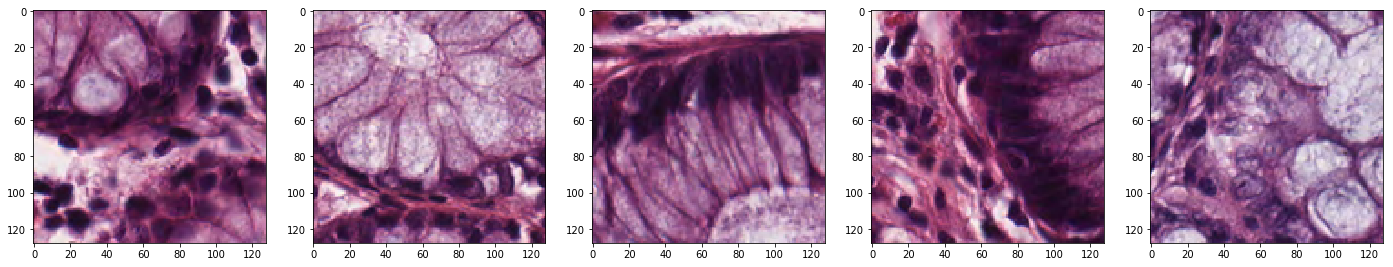

Stroma


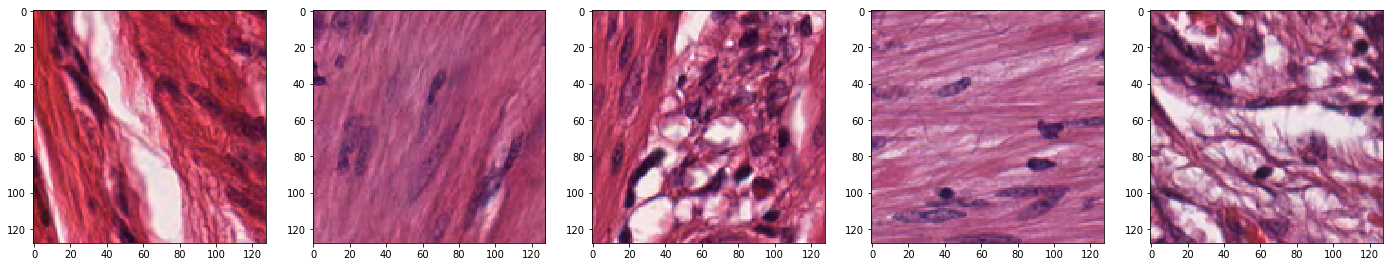

Tumor


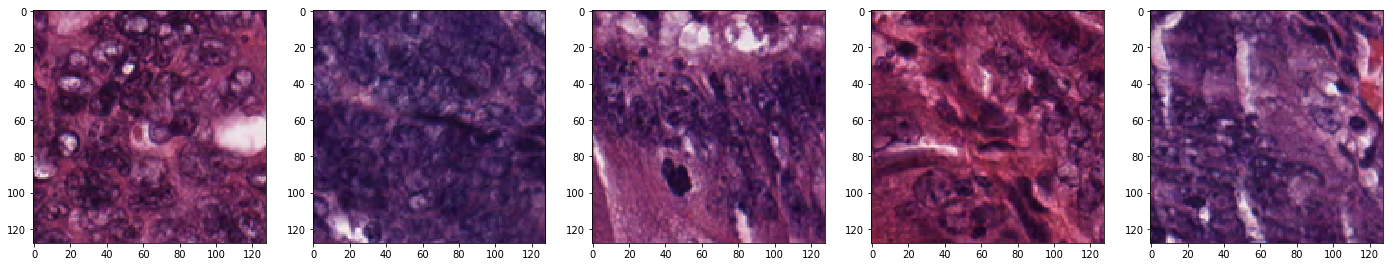

In [6]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Adipose')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(adipose1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Complex')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(complex1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Debris')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(debris1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Empty')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(empty1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Lympho')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(lympho1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Mucosa')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(mucosa1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Stroma')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(stroma1[j])
    
plt.show()

plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2.0)

print('Tumor')
for j in range(5):
    plt.subplot(150 + 1 + j)
    plt.imshow(tumor1[j])
    
plt.show()

Total Number of Samples:  5000
Number of Samples per Class:
ADIPOSE : 625
COMPLEX : 625
DEBRIS : 625
EMPTY : 625
LYMPHO : 625
MUCOSA : 625
STROMA : 625
TUMOR : 625


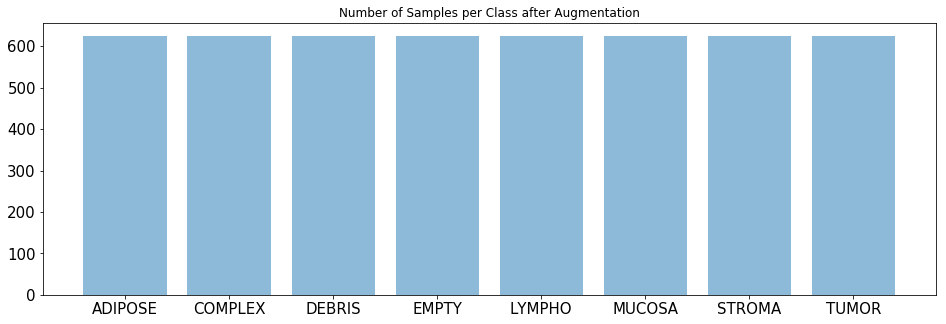

In [7]:
X = np.array(X_data)
Y = np.array(Y_data)

number_classes = [0,0,0,0,0,0,0,0]

for i in range(len(Y)):
    if (Y[i] == 0):
        number_classes[0] += 1
    elif (Y[i] == 1):
        number_classes[1] += 1
    elif (Y[i] == 2):
        number_classes[2] += 1
    elif (Y[i] == 3):
        number_classes[3] += 1
    elif (Y[i] == 4):
        number_classes[4] += 1
    elif (Y[i] == 5):
        number_classes[5] += 1
    elif (Y[i] == 6):
        number_classes[6] += 1
    elif (Y[i] == 7):
        number_classes[7] += 1
    elif (Y[i] == 8):
        number_classes[8] += 1

print("Total Number of Samples: ", len(X))
print("Number of Samples per Class:")  

for i in range(len(class_label)):
     print(class_label[i], ":", number_classes[i])

objects = class_label
y_pos = np.arange(len(objects))
samples = number_classes

plt.figure(figsize=[16,5])
plt.bar(y_pos, samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects, size=15)
plt.yticks(size=15)
plt.title('Number of Samples per Class after Augmentation')

plt.show()

In [8]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y_cat, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.2)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Number of Samples Train:  3500
Number of Samples Validation:  1200
Number of Samples Test:  300


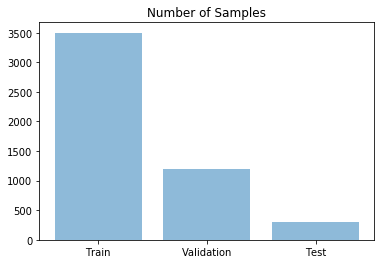

In [9]:
objects = ('Train', 'Validation', 'Test')
y_pos = np.arange(len(objects))
samples = []

samples.append(len(X_train))
samples.append(len(X_val))
samples.append(len(X_test))

print("Number of Samples Train: ", samples[0]) 
print("Number of Samples Validation: ", samples[1]) 
print("Number of Samples Test: ", samples[2]) 

plt.bar(y_pos, samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Number of Samples')

plt.show()

In [10]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 45:
        lr *= 1e-1
    elif epoch > 30:
        lr *= 1e-1
    elif epoch > 15:
        lr *= 1e-1
        
    print('Learning rate: ', lr)
    return lr

Samples for Training set:
ADIPOSE : 431
COMPLEX : 450
DEBRIS : 419
EMPTY : 438
LYMPHO : 449
MUCOSA : 436
STROMA : 448
TUMOR : 429


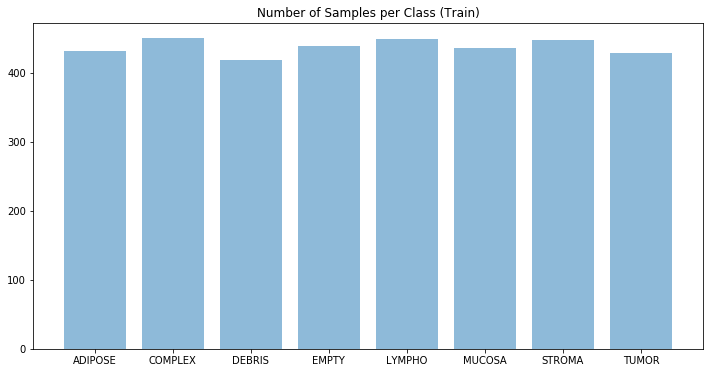

Samples for Validation set:
ADIPOSE : 157
COMPLEX : 136
DEBRIS : 172
EMPTY : 154
LYMPHO : 135
MUCOSA : 152
STROMA : 136
TUMOR : 158


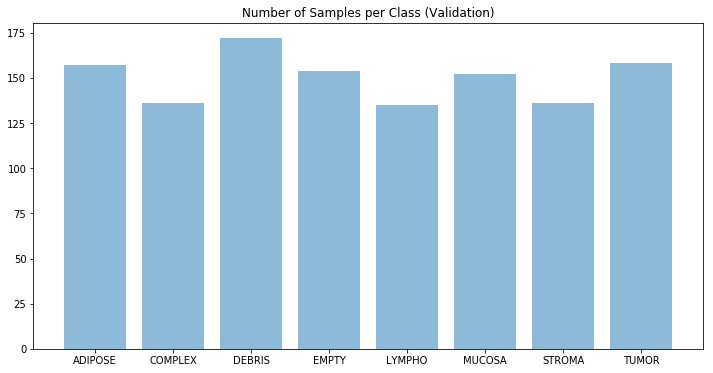

Samples for Testing set:
ADIPOSE : 37
COMPLEX : 39
DEBRIS : 34
EMPTY : 33
LYMPHO : 41
MUCOSA : 37
STROMA : 41
TUMOR : 38


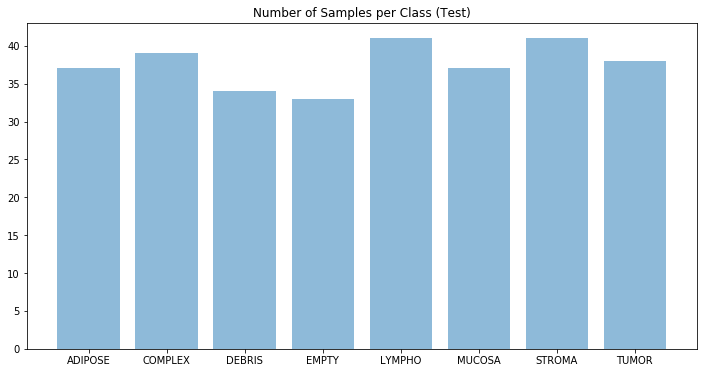

In [11]:
# y_train[1][8]
split_classes_train = [0,0,0,0,0,0,0,0]
split_classes_val = [0,0,0,0,0,0,0,0]
split_classes_test = [0,0,0,0,0,0,0,0]

for i in range(len(y_train)):
    for j in range(len(class_label)):
            if (y_train[i][j] == 1):
                split_classes_train[j] += 1
                
for i in range(len(y_val)):
    for j in range(len(class_label)):
            if (y_val[i][j] == 1):
                split_classes_val[j] += 1
                
for i in range(len(y_test)):
    for j in range(len(class_label)):
            if (y_test[i][j] == 1):
                split_classes_test[j] += 1
                
objects = class_label
y_pos = np.arange(len(objects))

print("Samples for Training set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_train[i])

samples_train = split_classes_train
samples_val = split_classes_val
samples_test = split_classes_test

#Train Samples
plt.figure(figsize=[12,6])
plt.bar(y_pos, samples_train, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Number of Samples per Class (Train)')
plt.show()

print("Samples for Validation set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_val[i])

#Validation Samples
plt.figure(figsize=[12,6])
plt.bar(y_pos, samples_val, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Number of Samples per Class (Validation)')
plt.show()

print("Samples for Testing set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_test[i])

#Test Samples
plt.figure(figsize=[12,6])
plt.bar(y_pos, samples_test, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Number of Samples per Class (Test)')
plt.show()

In [12]:
weight_decay = 0.0005

def block(x, width, stride, dropout):
    o1 = layers.BatchNormalization(axis=-1, 
                                   momentum=0.1, 
                                   epsilon=1e-5,  
                                   gamma_initializer='uniform')(x)
    o1 = layers.Activation('relu')(o1)
    y = layers.Conv2D(width,
                       kernel_size=(3, 3),
                       strides=(stride, stride),
                       padding='same',
                       kernel_initializer='glorot_uniform',
                       kernel_regularizer=keras.regularizers.l2(weight_decay),
                       use_bias=False)(o1)
    o2 = layers.BatchNormalization(axis=-1,
                            momentum=0.1,
                            epsilon=1e-5,
                            gamma_initializer='uniform')(y)
    if dropout > 0:
        o2 = layers.Dropout(dropout)(o2)
    o2 = layers.Activation('relu')(o2)
    z = layers.Conv2D(width,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      padding='same',
                      kernel_initializer='glorot_uniform',
                      kernel_regularizer=keras.regularizers.l2(weight_decay),
                      use_bias=False)(o2)
    if z.shape[-1] != x.shape[-1]:
        side_conv = layers.Conv2D(width,
                                  kernel_size=(3, 3),
                                  strides=(stride, stride),
                                  padding='same',
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=keras.regularizers.l2(weight_decay),
                                  use_bias=False)(o1)
        x = layers.Add()([z, side_conv])
    else:
        x = layers.Add()([z, x])

    return x

def group(x, n, width, stride, dropout):
    for i in range(n):
        x = block(x, width, stride if i ==0 else 1, dropout)
    return x

def wrn(input_shape, depth, width, num_classes, dropout):
    assert (depth - 4) % 6 == 0, 'depth should be 6n+4'
    n = (depth - 4) // 6
    widths = [int(v * width) for v in (16, 32)]

    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      padding='same',
                      kernel_initializer='glorot_uniform',
                      kernel_regularizer=keras.regularizers.l2(weight_decay),
                      use_bias=False)(inputs)
    for width, stride in zip(widths, [1, 2]):
        x = group(x, n, width, stride, dropout=dropout)

    x = layers.BatchNormalization(axis=-1,
                           momentum=0.1,
                           epsilon=1e-5,
                           gamma_initializer='uniform')(x)
    x = layers.Activation('relu')(x)
    x = layers.AveragePooling2D(pool_size=8)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='glorot_uniform')(y)


    # Instantiate model.
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = wrn(input_shape=(128, 128, 3), depth=16, width=1, num_classes=8, dropout=0.5)
print(model.summary())

opt = Adam(lr=lr_schedule(0))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [13]:
validation_datagen = ImageDataGenerator(width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,)

test_datagen = ImageDataGenerator()

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        )

In [14]:
train_datagen.fit(X_train)
validation_datagen.fit(X_val)
test_datagen.fit(X_test)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [15]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.5e-6)

lr_scheduler = LearningRateScheduler(lr_schedule)

In [16]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=2*(len(X_train) // 32),
    epochs=60, 
    validation_steps=10,
    validation_data=validation_generator, 
    callbacks=[lr_scheduler, reduce_lr],
    verbose=1 )

model.save('model_Adam_2.h5')

Epoch 1/60
Learning rate:  0.001
218/218 [==============================] - 55s 254ms/step - loss: 1.1046 - acc: 0.5793 - val_loss: 0.7260 - val_acc: 0.7031
Epoch 2/60
Learning rate:  0.001
218/218 [==============================] - 42s 193ms/step - loss: 0.6751 - acc: 0.7618 - val_loss: 0.6692 - val_acc: 0.7063
Epoch 3/60
Learning rate:  0.001
218/218 [==============================] - 42s 194ms/step - loss: 0.6378 - acc: 0.7723 - val_loss: 0.5530 - val_acc: 0.8094
Epoch 4/60
Learning rate:  0.001
218/218 [==============================] - 43s 195ms/step - loss: 0.5646 - acc: 0.7955 - val_loss: 0.5652 - val_acc: 0.7763
Epoch 5/60
Learning rate:  0.001
218/218 [==============================] - 42s 195ms/step - loss: 0.5544 - acc: 0.8136 - val_loss: 0.5652 - val_acc: 0.7688
Epoch 6/60
Learning rate:  0.001
218/218 [==============================] - 42s 194ms/step - loss: 0.5367 - acc: 0.8107 - val_loss: 0.5502 - val_acc: 0.8344
Epoch 7/60
Learning rate:  0.001
218/218 [================

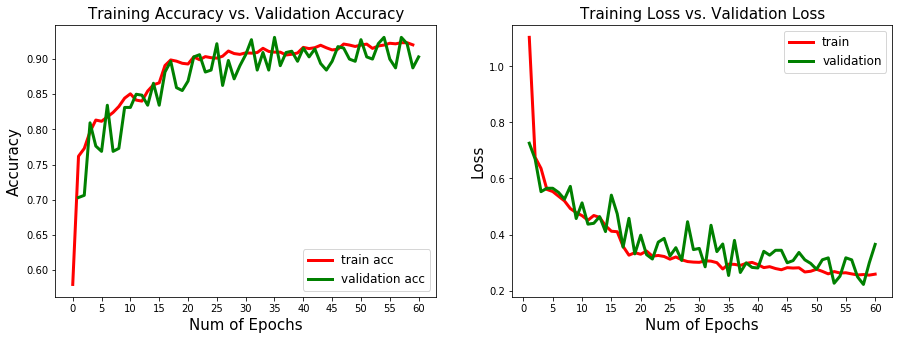

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 5))
  
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(np.arange(0, len(history.history['acc'])), acc, 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_acc'])+1), val_acc, 'g', linewidth=3)
plt.xticks(np.arange(0, 60+1, 5))
plt.title('Training Accuracy vs. Validation Accuracy', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(['train acc', 'validation acc', 'train loss', 'validation loss'], loc='best', fontsize='large')
  
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], 'g', linewidth=3)
plt.xticks(np.arange(0, 60+1, 5))
plt.title('Training Loss vs. Validation Loss', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(['train', 'validation'], loc='best', fontsize='large')
  
plt.show()

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(len(acc)):
    acc[i] = '{:.4}'.format(acc[i])
    val_acc[i] = '{:.4}'.format(val_acc[i])
    loss[i] = '{:.4}'.format(loss[i])
    val_loss[i] = '{:.4}'.format(val_loss[i])
    
d = {'acc': acc, 'val_acc': val_acc, 
     'loss': loss, 'val_loss': val_loss}
df = pd.DataFrame(data=d)
print(df)

       acc val_acc    loss val_loss
0   0.5795  0.7031   1.104    0.726
1   0.7618  0.7063  0.6756   0.6692
2   0.7729  0.8094   0.636    0.553
3   0.7967  0.7763   0.561   0.5652
4   0.8133  0.7688  0.5534   0.5652
5   0.8116  0.8344  0.5366   0.5502
6   0.8178  0.7688  0.5201   0.5262
7   0.8241   0.773  0.4928   0.5719
8   0.8326  0.8313  0.4782   0.4572
9   0.8444  0.8313  0.4675    0.513
10  0.8506    0.85  0.4509   0.4371
11  0.8417  0.8487   0.468   0.4401
12  0.8403  0.8344  0.4612    0.464
13  0.8545  0.8656  0.4317   0.4106
14  0.8635  0.8344  0.4119   0.5407
15  0.8662  0.8816  0.4101   0.4741
16  0.8909  0.8969  0.3578   0.3552
17  0.8988  0.8594  0.3264   0.4579
18  0.8971  0.8553  0.3353   0.3311
19   0.894  0.8688  0.3297   0.3977
20   0.893  0.9031  0.3412   0.3284
21  0.9031  0.9062  0.3229   0.3127
22  0.8991  0.8816  0.3254    0.373
23  0.9035  0.8844  0.3218   0.3864
24   0.902  0.9219  0.3121   0.3234
25  0.9014  0.8625    0.32   0.3532
26  0.9041   0.898    0.31  

In [19]:
y_img_batch, y_class_batch = test_generator[0] 

for i in range(1,len(test_generator)):
    testX = test_generator[i][0]
    testY = test_generator[i][1]
    y_img_batch = np.concatenate((y_img_batch, testX))
    y_class_batch = np.concatenate((y_class_batch, testY))

y_pred = np.argmax(model.predict(y_img_batch),axis=-1)
y_true = np.argmax(y_class_batch,axis=-1)

Incorrect Predictions: 


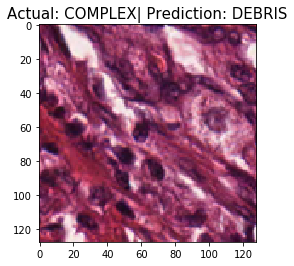

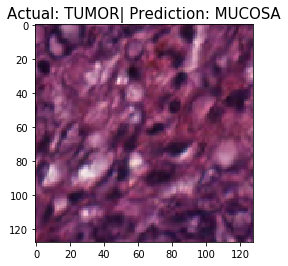

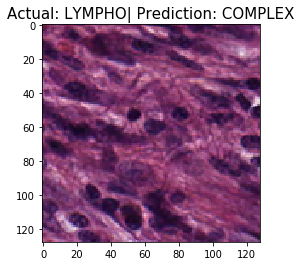

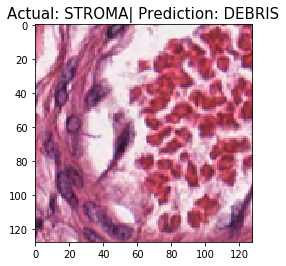

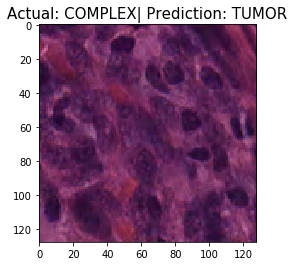

Correct Predictions: 


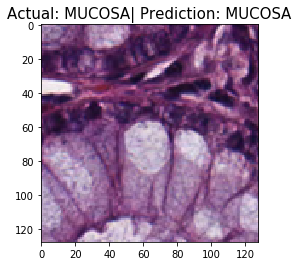

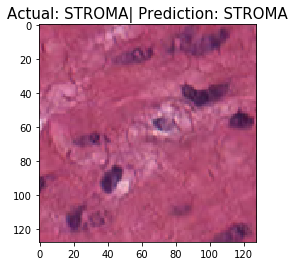

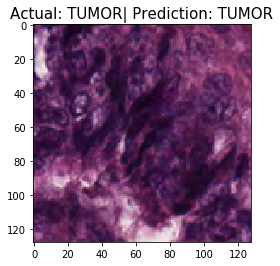

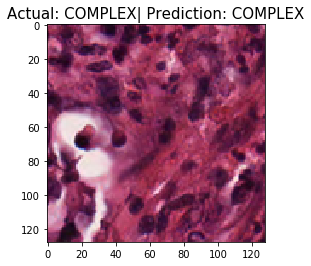

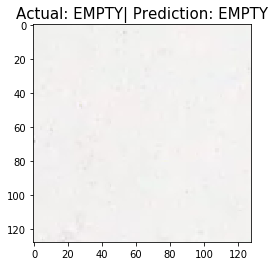

In [20]:
counterI=0
counterC=0
i = 0
print('Incorrect Predictions: ')
while counterI < 5:
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    if (actual_label != predict_label):
        plt.imshow((y_img_batch[i]))
        plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
        plt.show()
        counterI+=1
        i+=1
    else:
        i+=1
     
i=0
print('Correct Predictions: ')
while counterC < 5:
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    if (actual_label == predict_label):
        plt.imshow((y_img_batch[i]))
        plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
        plt.show()
        counterC+=1
        i+=1
    else:
        i+=1

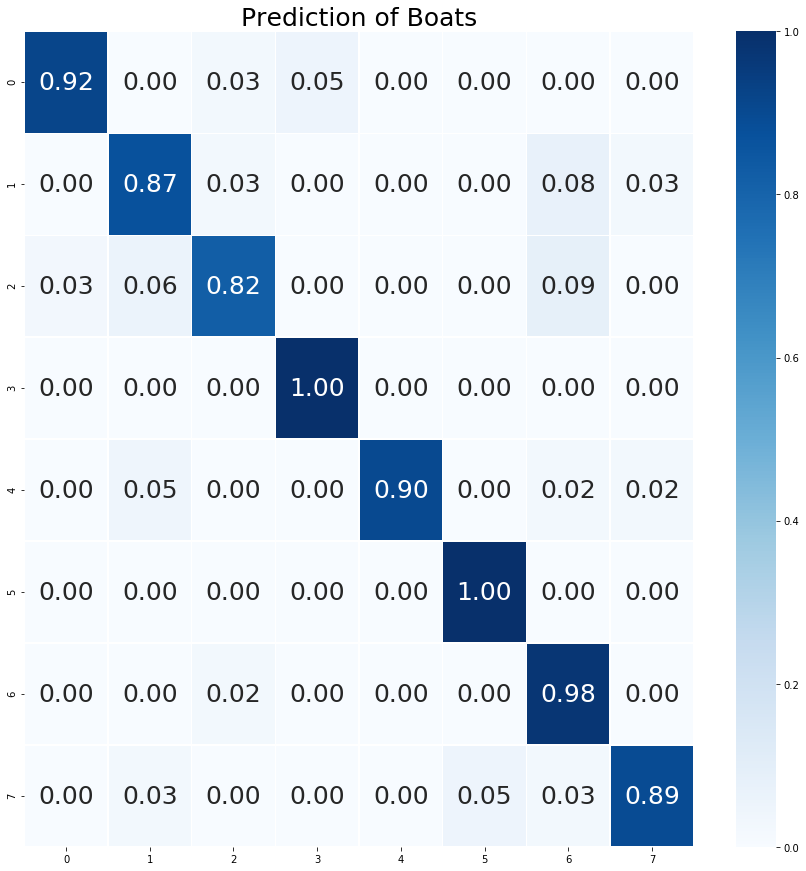

In [21]:
cm = confusion_matrix(y_true, y_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,15))
plt.title('Prediction of Boats', fontsize = 25)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues", annot_kws={"size": 25})

In [22]:
print(classification_report(y_true, y_pred, target_names=class_label))

              precision    recall  f1-score   support

     ADIPOSE       0.97      0.92      0.94        37
     COMPLEX       0.87      0.87      0.87        39
      DEBRIS       0.90      0.82      0.86        34
       EMPTY       0.94      1.00      0.97        33
      LYMPHO       1.00      0.90      0.95        41
      MUCOSA       0.95      1.00      0.97        37
      STROMA       0.83      0.98      0.90        41
       TUMOR       0.94      0.89      0.92        38

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [23]:
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

n_classes = len(class_label)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_true)
y_pred = lb.transform(y_pred)

lw = 5

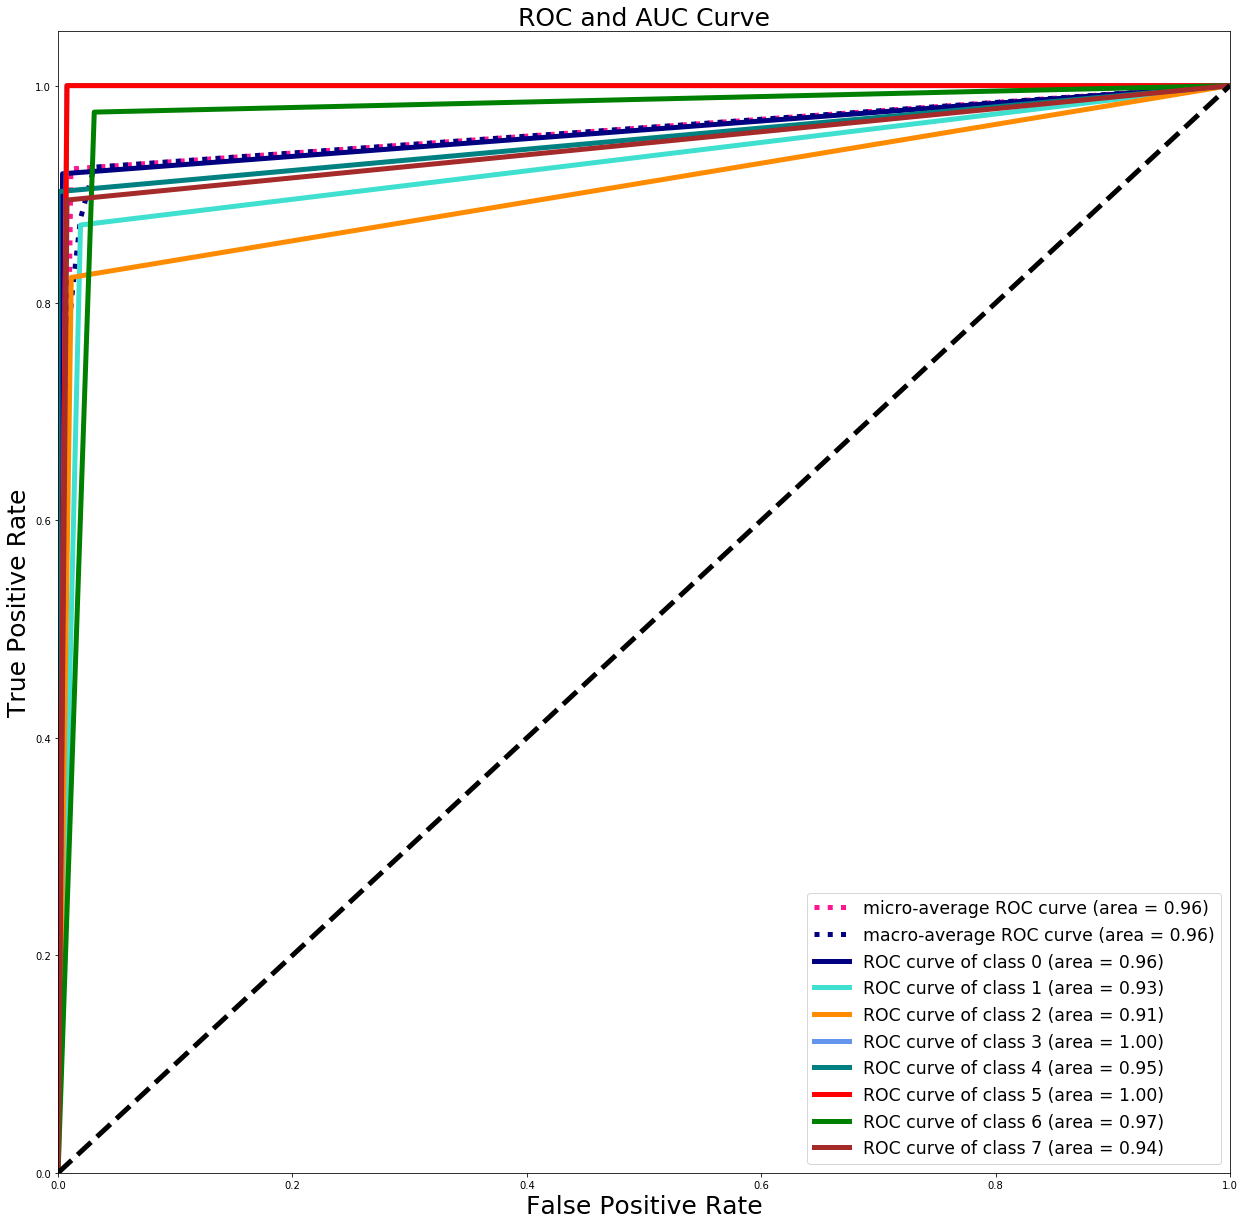

ROC_AUC_Score: 0.9561984026234602


In [24]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
#     # Plot of a ROC curve for a specific class
#     for i in range(n_classes):
#         plt.figure(figsize=(15,15))
#         plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver operating characteristic example')
#         plt.legend(loc="lower right")
#         plt.show()


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(21,21))
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=lw)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 25)
    plt.ylabel('True Positive Rate', fontsize = 25)
    plt.title('ROC and AUC Curve', fontsize = 25)
    plt.legend(loc="lower right",fontsize='xx-large')
    plt.show()
        
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC_AUC_Score:", multiclass_roc_auc_score(y_true, y_pred))

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
    
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.4f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.8621


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.8621')

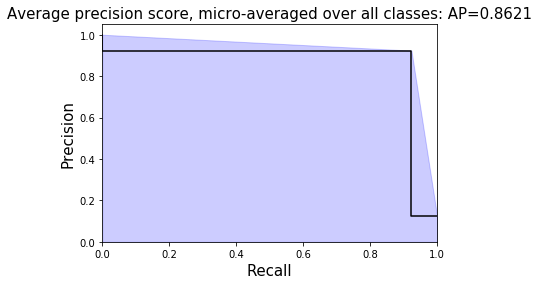

In [26]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='black', alpha=1.0,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='blue')#,
                 #**step_kwargs)

plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.4f}'
    .format(average_precision["micro"]), fontsize = 15)

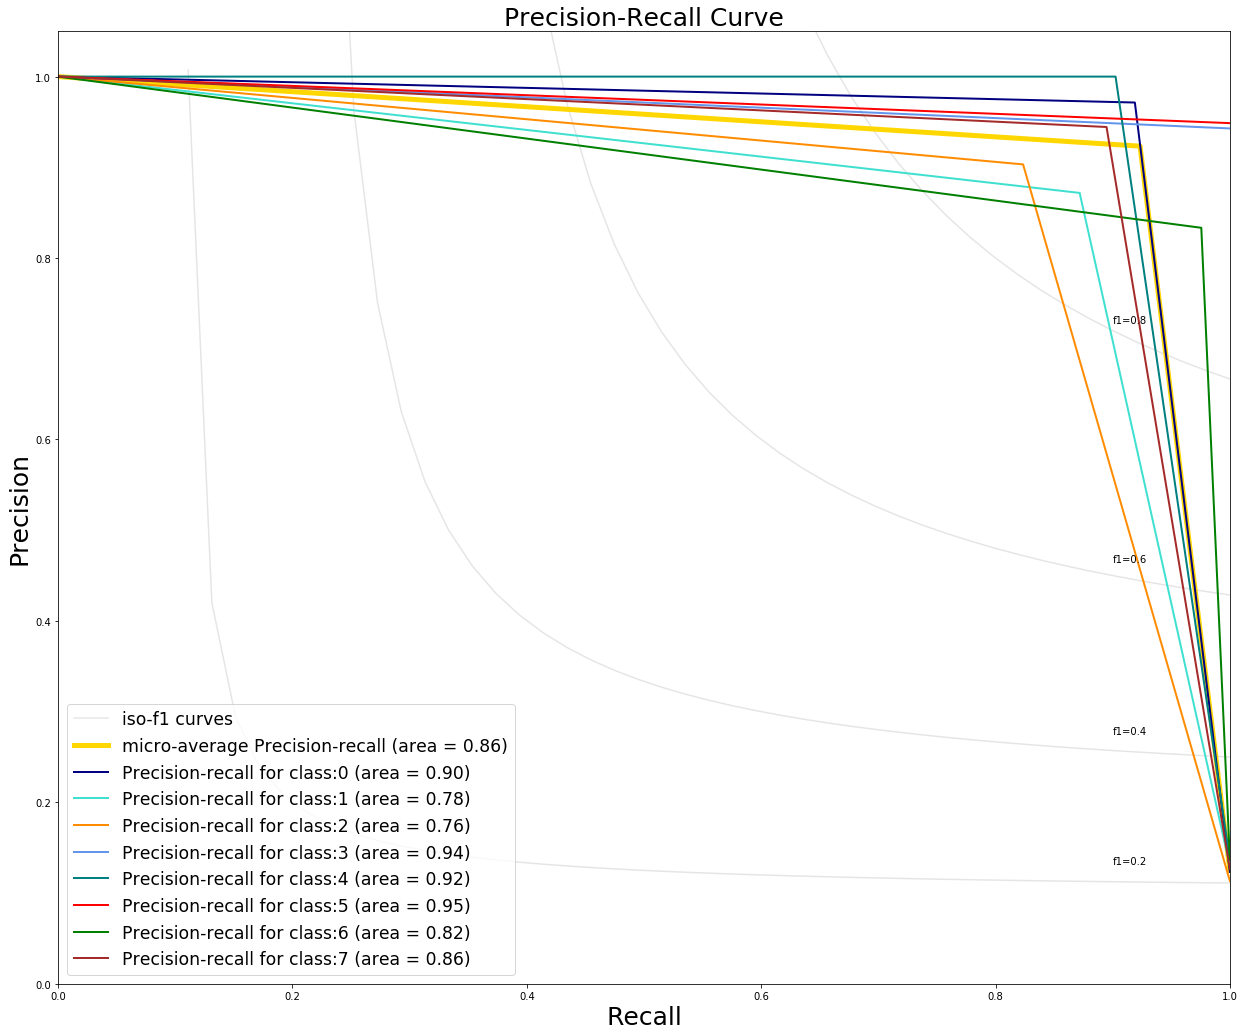

In [27]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])

plt.figure(figsize=(21, 21))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize = 25)
plt.ylabel('Precision', fontsize = 25)
plt.title('Precision-Recall Curve', fontsize = 25)
plt.legend(lines, labels, loc='lower left', fontsize='xx-large')


plt.show()